In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("LargeMovieDataset.csv")
df

,MovieID,Title,Genre,Rating,Popularity
0,1,Chaos Theory 1,Horror,3.5,93
1,2,Mystic Falls 2,Sci-Fi,3.4,34
2,3,The Legend 3,Horror,4.2,74
3,4,Chaos Theory 4,Documentary,2.2,59
4,5,Infinite Horizon 5,Sci-Fi,3.7,77
...,...,...,...,...,...
9995,9996,Mystic Falls 9996,Horror,4.7,30
9996,9997,Chaos Theory 9997,Sci-Fi,4.3,76
9997,9998,Storm Riders 9998,Fantasy,3.7,77
9998,9999,Fearless Fighter 9999,Comedy,4.2,34


In [3]:
df.head()

,MovieID,Title,Genre,Rating,Popularity
0,1,Chaos Theory 1,Horror,3.5,93
1,2,Mystic Falls 2,Sci-Fi,3.4,34
2,3,The Legend 3,Horror,4.2,74
3,4,Chaos Theory 4,Documentary,2.2,59
4,5,Infinite Horizon 5,Sci-Fi,3.7,77


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MovieID     10000 non-null  int64  
 1   Title       10000 non-null  object 
 2   Genre       10000 non-null  object 
 3   Rating      10000 non-null  float64
 4   Popularity  10000 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 390.8+ KB


In [5]:
df.isnull().sum()

MovieID       0
Title         0
Genre         0
Rating        0
Popularity    0
dtype: int64

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MovieID,10000.0,5000.50000,2886.895680,1.0,2500.75,5000.5,7500.25,10000.0
Rating,10000.0,3.00605,1.148119,1.0,2.00,3.0,4.00,5.0
Popularity,10000.0,50.72950,28.636573,1.0,26.00,51.0,76.00,100.0


In [7]:
features = df[["Rating", "Popularity"]]
features

,Rating,Popularity
0,3.5,93
1,3.4,34
2,4.2,74
3,2.2,59
4,3.7,77
...,...,...
9995,4.7,30
9996,4.3,76
9997,3.7,77
9998,4.2,34


In [8]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
scaled_features

array([[ 0.43024679,  1.4761757 ],
       [ 0.34314348, -0.5842297 ],
       [ 1.03996995,  0.81265532],
       ...,
       [ 0.60445341,  0.91742169],
       [ 1.03996995, -0.5842297 ],
       [ 0.95286664, -1.38743858]])

In [9]:
scaled_df = pd.DataFrame(scaled_features, columns=features.columns)
scaled_df

,Rating,Popularity
0,0.430247,1.476176
1,0.343143,-0.584230
2,1.039970,0.812655
3,-0.702096,0.288823
4,0.604453,0.917422
...,...,...
9995,1.475486,-0.723918
9996,1.127073,0.882500
9997,0.604453,0.917422
9998,1.039970,-0.584230


In [10]:
scaled_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rating,10000.0,-9.734435e-17,1.00005,-1.747336,-0.876303,-0.005270,0.865763,1.736796
Popularity,10000.0,-5.684342e-17,1.00005,-1.736660,-0.863607,0.009446,0.882500,1.720631


In [11]:
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

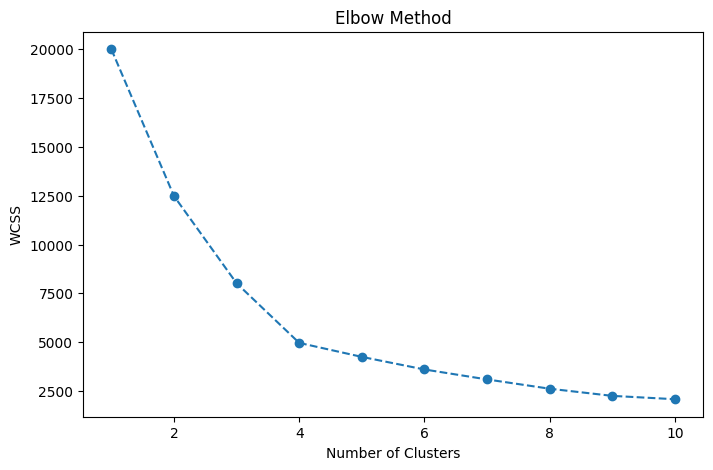

In [12]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [13]:
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)

kmeans

KMeans(n_clusters=5, random_state=42)

In [14]:
centroids = kmeans.cluster_centers_
print('Cluster Centers (scaled):\n', centroids)

actual_centroids = scaler.inverse_transform(centroids)
print('Cluster Centers (original scale):\n', actual_centroids)

Cluster Centers (scaled):
 [[ 0.89461089 -1.12679978]
 [-0.9067158   0.88120833]
 [ 0.88425201  1.15078794]
 [-0.90482533 -0.90288309]
 [ 0.69750878 -0.0058999 ]]
Cluster Centers (original scale):
 [[ 4.03311878 18.46342891]
 [ 1.96508403 75.96302521]
 [ 4.02122614 83.68247542]
 [ 1.96725441 24.87531486]
 [ 3.80683333 50.56055556]]


In [15]:
cluster_centers = pd.DataFrame(actual_centroids, columns=features.columns)
cluster_centers

,Rating,Popularity
0,4.033119,18.463429
1,1.965084,75.963025
2,4.021226,83.682475
3,1.967254,24.875315
4,3.806833,50.560556


Text(0.5, 1.0, 'Clusters of Movies')

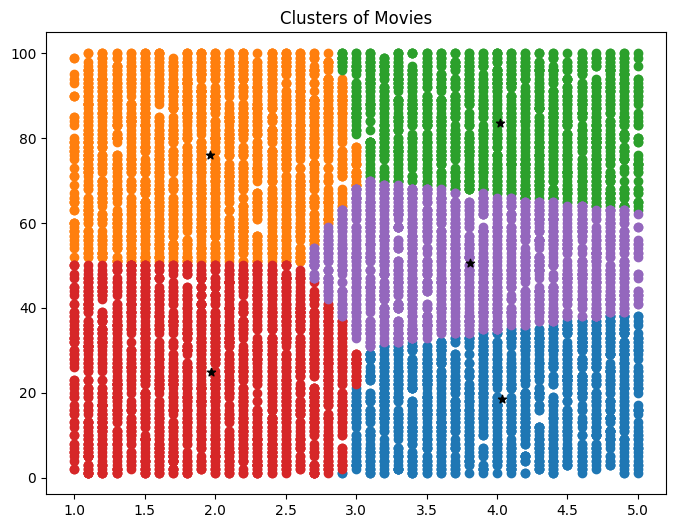

In [16]:
plt.figure(figsize=(8, 6))
for cluster in range(optimal_k):
    plt.scatter(df[df['Cluster'] == cluster]['Rating'], 
                df[df['Cluster'] == cluster]['Popularity'], 
                label=f'Cluster {cluster}')

plt.scatter(cluster_centers['Rating'], cluster_centers['Popularity'], color='black', marker='*', label='Centroid')
plt.title('Clusters of Movies')

In [17]:
df

,MovieID,Title,Genre,Rating,Popularity,Cluster
0,1,Chaos Theory 1,Horror,3.5,93,2
1,2,Mystic Falls 2,Sci-Fi,3.4,34,4
2,3,The Legend 3,Horror,4.2,74,2
3,4,Chaos Theory 4,Documentary,2.2,59,1
4,5,Infinite Horizon 5,Sci-Fi,3.7,77,2
...,...,...,...,...,...,...
9995,9996,Mystic Falls 9996,Horror,4.7,30,0
9996,9997,Chaos Theory 9997,Sci-Fi,4.3,76,2
9997,9998,Storm Riders 9998,Fantasy,3.7,77,2
9998,9999,Fearless Fighter 9999,Comedy,4.2,34,0


In [18]:
df['Cluster'].value_counts()

Cluster
3    2384
1    2380
4    1794
2    1737
0    1705
Name: count, dtype: int64

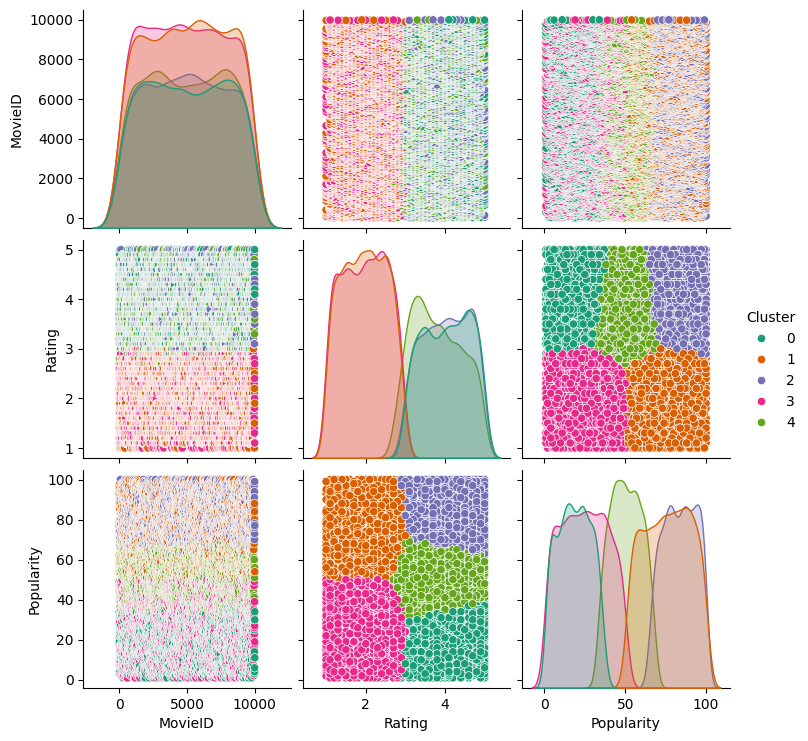

In [19]:
import seaborn as sns
sns.pairplot(df, hue='Cluster', palette='Dark2')
plt.show()

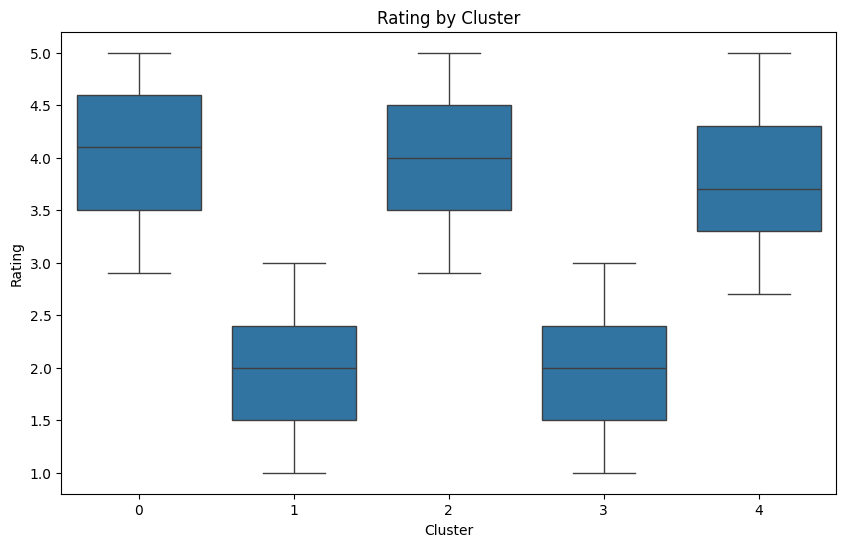

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='Rating', data=df)
plt.title('Rating by Cluster')
plt.show()

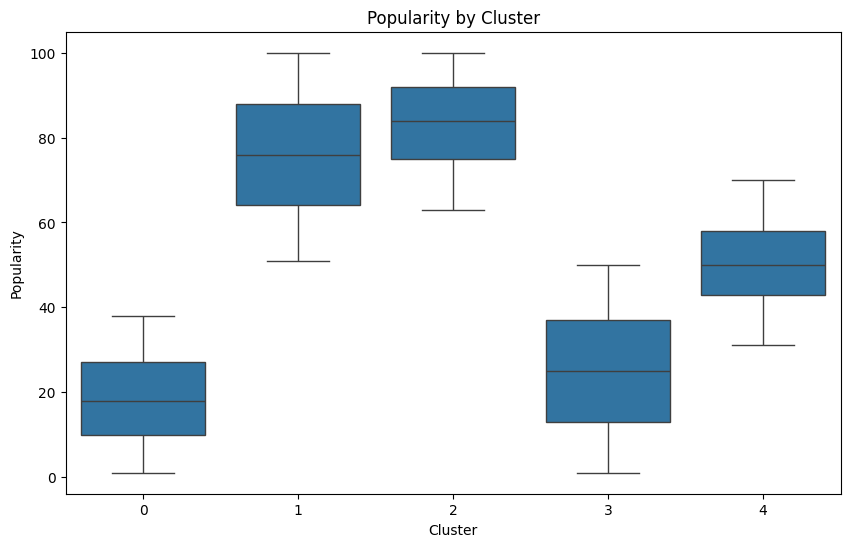

In [21]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='Popularity', data=df)
plt.title('Popularity by Cluster')
plt.show()

In [22]:
def recommend_movies(movie_title, data, num_recommendations=5):
    """
    Recommends movies similar to the input movie based on clustering.

    Parameters:
        movie_title (str): The title of the movie provided by the user.
        data (pd.DataFrame): The dataset containing movie details and clusters.
        num_recommendations (int): Number of movies to recommend.

    Returns:
        list: Recommended movie titles.
    """
    if movie_title not in data['Title'].values:
        return f"The movie '{movie_title}' is not in the dataset."
    
    print(movie_title)

    movie_cluster = data[data['Title'] == movie_title]['Cluster'].iloc[0]
    print(movie_cluster)
    
    similar_movies = data[data['Cluster'] == movie_cluster]
    
    similar_movies = similar_movies[similar_movies['Title'] != movie_title]
    
    num_recommendations = min(num_recommendations, len(similar_movies))
    
    recommendations = similar_movies.sample(num_recommendations)['Title'].tolist()
    
    return recommendations

In [23]:
input_movie = input("Enter a movie title: ")

recommendations = recommend_movies(input_movie, df, num_recommendations=10)

if isinstance(recommendations, list):
    print("Here are some movies you might like:")
    for movie in recommendations:
        print(f"- {movie}")
else:
    print(recommendations)

The Legend 3
2
Here are some movies you might like:
- Lost Kingdom 1125
- The Legend 6213
- Hidden Truth 9404
- Lost Kingdom 841
- The Legend 32
- Storm Riders 1530
- City Lights 4938
- The Chasers 120
- The Awakening 9431
- Infinite Horizon 3754
